# Exercise for PhD students and interested Master students

## Task (A): Simulate Realized- vs-Expected Equity Return Model

A.1 Set the seed to 123. Treat number of time points T and parameters as hyperparameters. For a start, use the default values T=100, phi = 0.94, sigma_x = 0.01, sigma_r = 0.24, rho = -0.8. Simulate one path of r_t and x_t for T observations.

A.2 Plot the realized time-series of r_t and x_t. Use black ink for x_t and red ink for r_t


## Task (B): Kalman Filtering x_t based on r_t

B.1 Plot prior and posterior mean of Kalman filter estimate for x_t together with r_t and the true x_t.

# Model Framework

#### We Work here with our own simulated, yet realistic, Realized-vs-Expected Return-Model

$$
\\
$$
 
\begin{equation}
      r_{t} = x_{t} + \sigma_r  \delta_{t}, \; \delta_t \sim N(0,1)
\end{equation}
\begin{equation}
      x_{t} = \phi  x_{t-1} + \sigma_x  \epsilon_{t}, \; \epsilon_{t} \sim N(0,1)
\end{equation}

$$
\\
$$
 

**Parametrization:** We work with KNOWN parameters:
        
$$
\phi \in (-1,1)
$$

$$
\sigma_x \in \mathcal{R}_+
$$

$$
\sigma_r = \in \mathcal{R}_+
$$

$$
E[\delta_t e_t] =:\rho \in [-1,1]
$$

$$
\\
$$

**Signal-to-Noise-Ratio (SNR)** KF identifies $x$ only precisely if data is informative (i.e. better: SNR is away from zero, i.e. $SNR \rightarrow 1$)

$$
SNR := \frac{\sigma_x}{\sigma_r} \; \in (0,1)
$$

In [1]:
#packages

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
export = True
figsize=(15,15)

## Solution to A.1

In [2]:
#seed
np.random.seed(123)

#T
T =  100 #1000 # time steps

#parameters
phi = 0.94
sigma_x = 0.01 # 0.04    #0.1 
sigma_r = 0.24 #0.4
rho = -0.8

# Translate (r_t,x_t) into a MV-Gauss density N(mu,Sigma)
mu    = [0,0]
Sigma = [[sigma_r**2, rho * sigma_r * sigma_x], [rho * sigma_r * sigma_x, sigma_x**2]]


# T times N(mu,Sigma)
innov = np.random.multivariate_normal(mu, Sigma, T)

# \{r_t,x_t\}_{t \in 1,...,T}
r = np.empty(T)
x = np.empty(T)

r[0] = innov[0,0] #starting value, here: r_0 = innov_r(0)
x[0] = innov[0,1] #starting value, here: x_0 = innov_x(0)
for t in range(1,T):
    x[t] = phi * x[t-1] + innov[t,1]
    r[t] = x[t]         + innov[t,0]

## Solution to A.2

Text(0.5, 1.0, 'Realized and Expected Returns')

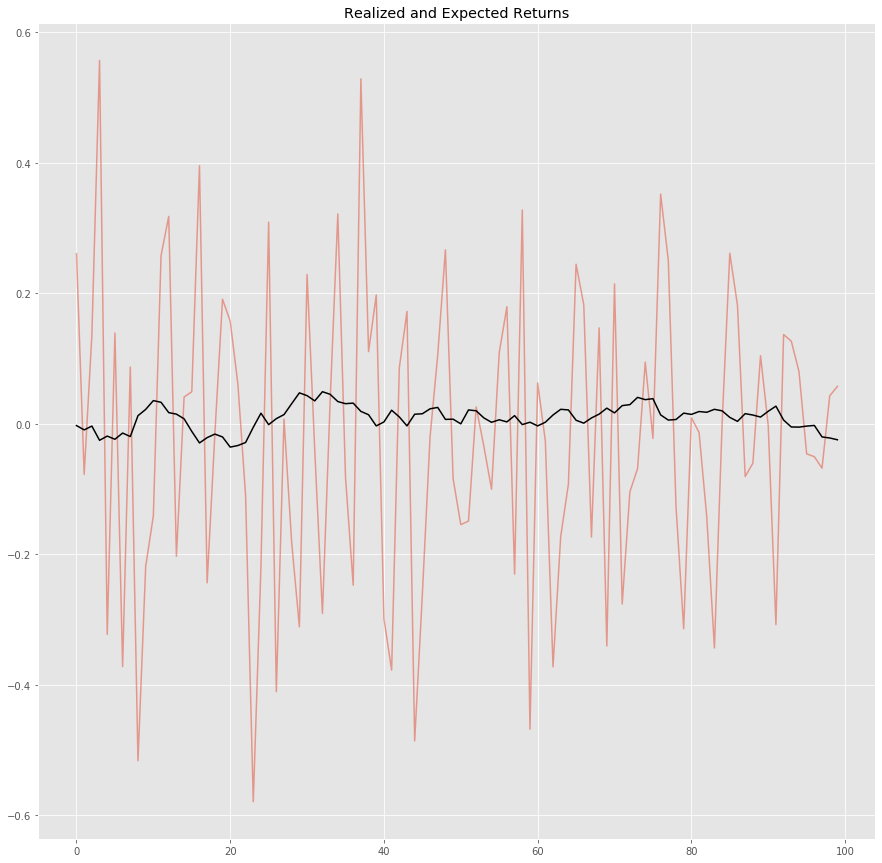

In [3]:
#visualize how x hides wihtin r
plt.figure(1,figsize=(15,15))
plt.plot(range(0,T), r, alpha=0.5)
plt.plot(range(0,T), x, 'black')
plt.title('Realized and Expected Returns')
 

## Solution to B.1

In [4]:
#Assume parameters are known
y   = [np.matrix(t) for t in list(r)]
a   = np.matrix(0)
B   = np.matrix(1)
H   = sigma_r**2
c   = np.matrix(0)
Phi = np.matrix(phi)
Q   = sigma_x**2

In [5]:
#call Helper Function with KF-Recursions
from ipynb.fs.defs.Solution_KF_Recursions_LGSSM_1dm import KalmanFilter_Recursions_1dim 

KF_r_ = KalmanFilter_Recursions_1dim(y, a, B, H, c, Phi, Q)

In [6]:
#get posterior and prior state estimates
at, Pt, atm1, Ptm1 = KF_r_.runRecursions()

**Visualize simulated $x_t$ vs its KF Prior and Posterior Estimate**

Text(0.5, 1.0, 'simulated r and x, vs. mean of prior and posterior on x')

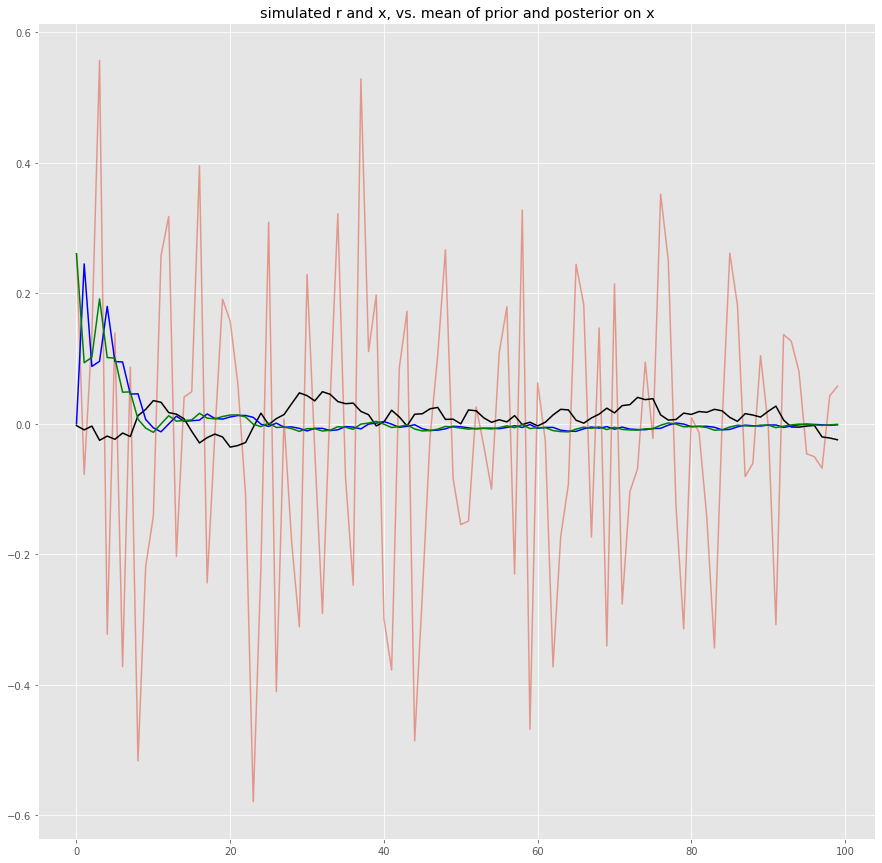

In [7]:
#visualize r vs x vs prior and posterior estimates 

plt.figure(2,figsize=(15,15))
plt.plot(range(0,T), r, alpha=0.5)
plt.plot(range(0,T), x, 'black')
plt.plot(range(0,T), atm1[:-1], 'blue')
plt.plot(range(0,T), at, 'green')
plt.title('simulated r and x, vs. mean of prior and posterior on x')

**Observation**

- Filter estimates are as useful as the estimates for 

$$
\sigma_x \quad \text{} \quad \sigma_r.
$$
This is also a form of Garbage In, Garbage Out problem. Reason: Kalman recursions are deterministic functions of the Signal-to-Noise-Ratio.

$$
\\
$$

- The higher the Signal-to-Noise-Ratio, the more does $x_t$ follow $r_t$.

$$
\\
$$

- It is not on us to set $\sigma_x$ and $\sigma_r$. These are data characteristics. Our job is to find precise estimates.

$$
\\
$$

- Engineering has the advantage that $\sigma_r$ is sensor noise and that firms like Bosch etc build highest precision sensors. Also, $\sigma_x$ in Engineering are things like wind speed, accelaration of an object, etc. Said differently, Engineering has built over hundreds of years precise sensors and theories. Finance is not there yet. Financial Data Science as a young discipline offers opportunities and high chance of being fooled by randomness

$$
\\
$$

- Financial Data Scientists: need to be theory and data savvy to find good estimates for the data SNR.